# Importing library's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from warnings import filterwarnings
from statsmodels.stats.multicomp import pairwise_tukeyhsd
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)

In [2]:
data = pd.read_csv('train_MpHjUjU.csv') #loading the orginal data file

In [3]:
data.info()# to know the information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
 13  Target                19104 non-null  bool  
dtypes: bool(1), int64(7), object(6)
memory usage: 1.9+ MB


In [4]:
data.isnull().sum()# to know the null_values

MMM-YY                      0
Emp_ID                      0
Age                         0
Gender                      0
City                        0
Education_Level             0
Salary                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Designation                 0
Total Business Value        0
Quarterly Rating            0
Target                      0
dtype: int64

In [5]:
data["Target"]=data["Target"].replace(to_replace=[True,False],value=[0,1])#replacing true or false and 0 and 1

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
 13  Target                19104 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.0+ MB


# Target

In [7]:
data.Target.value_counts()#to know the inside values-number of unique values

0    17488
1     1616
Name: Target, dtype: int64

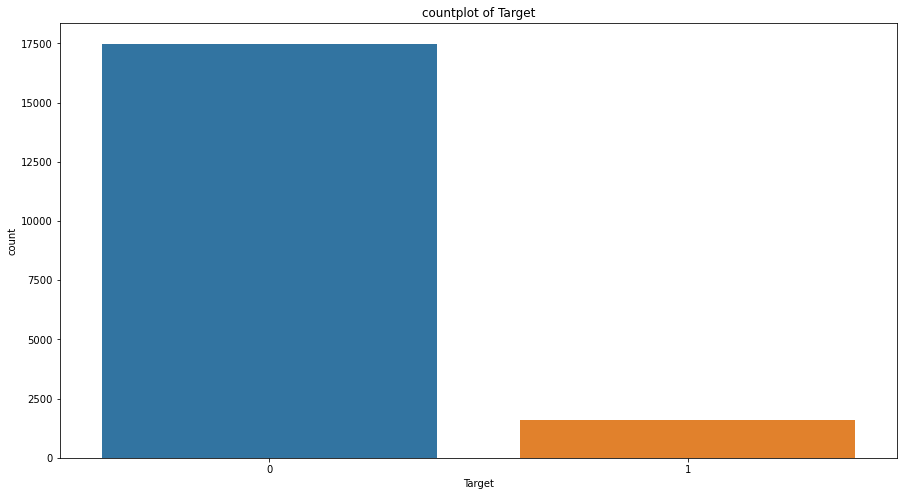

In [8]:
sns.countplot(data.Target)
plt.title("countplot of Target")
plt.show()

#here we can see that the employee does not leave the organization is  more compare to the resigned employee to the organization

In [9]:
data.Target.describe()

count    19104.000000
mean         0.084590
std          0.278277
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Target, dtype: float64

# MMM-YY

In [10]:
data = data.rename(columns={"MMM-YY":"Reporting_Date"})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Reporting_Date        19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
 13  Target                19104 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 2.0+ MB


In [12]:
data.Reporting_Date.value_counts()

01-01-2016    1022
02-01-2016     944
03-01-2016     870
12-01-2017     819
10-01-2017     818
08-01-2017     812
09-01-2017     809
07-01-2017     806
11-01-2017     805
12-01-2016     795
04-01-2016     794
01-01-2017     782
11-01-2016     781
06-01-2017     770
05-01-2017     766
05-01-2016     764
09-01-2016     762
02-01-2017     761
07-01-2016     757
08-01-2016     754
10-01-2016     739
04-01-2017     729
06-01-2016     726
03-01-2017     719
Name: Reporting_Date, dtype: int64

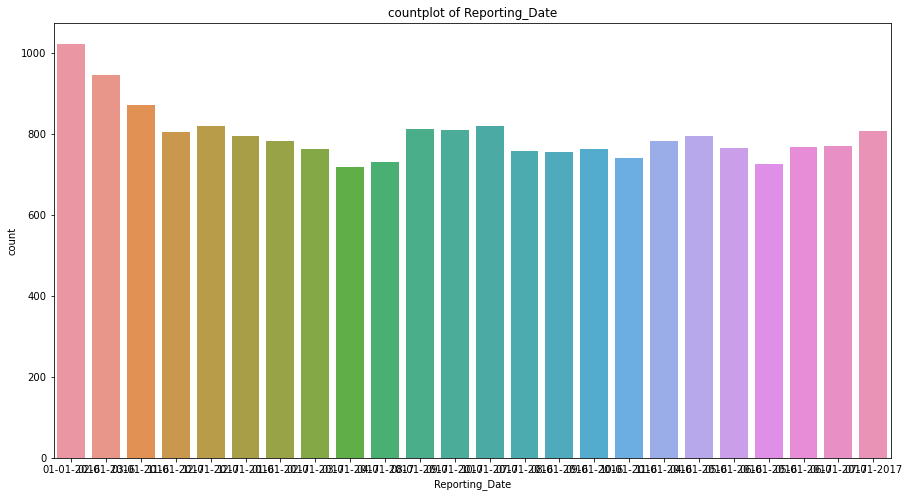

In [13]:
sns.countplot(data.Reporting_Date)
plt.title("countplot of Reporting_Date")
plt.show()

In [14]:
data.groupby("Reporting_Date")["Target"].describe()

,count,mean,std,min,25%,50%,75%,max
Reporting_Date,,,,,,,,
01-01-2016,1022.0,0.082192,0.274791,0.0,0.0,0.0,0.0,1.0
01-01-2017,782.0,0.085678,0.280067,0.0,0.0,0.0,0.0,1.0
02-01-2016,944.0,0.079449,0.270582,0.0,0.0,0.0,0.0,1.0
02-01-2017,761.0,0.094612,0.292871,0.0,0.0,0.0,0.0,1.0
03-01-2016,870.0,0.086207,0.280831,0.0,0.0,0.0,0.0,1.0
03-01-2017,719.0,0.082058,0.274645,0.0,0.0,0.0,0.0,1.0
04-01-2016,794.0,0.060453,0.238475,0.0,0.0,0.0,0.0,1.0
04-01-2017,729.0,0.063100,0.243310,0.0,0.0,0.0,0.0,1.0
05-01-2016,764.0,0.132199,0.338929,0.0,0.0,0.0,0.0,1.0


In [15]:
from scipy.stats import chi2_contingency

In [16]:
a=pd.crosstab(data.Reporting_Date,data.Target)
print(a)
b=chi2_contingency(a)
print('\np value is:',b[1])

Target            0    1
Reporting_Date          
01-01-2016      938   84
01-01-2017      715   67
02-01-2016      869   75
02-01-2017      689   72
03-01-2016      795   75
03-01-2017      660   59
04-01-2016      746   48
04-01-2017      683   46
05-01-2016      663  101
05-01-2017      703   63
06-01-2016      671   55
06-01-2017      708   62
07-01-2016      699   58
07-01-2017      719   87
08-01-2016      707   47
08-01-2017      742   70
09-01-2016      673   89
09-01-2017      748   61
10-01-2016      677   62
10-01-2017      756   62
11-01-2016      716   65
11-01-2017      741   64
12-01-2016      729   66
12-01-2017      741   78

p value is: 4.231387325099061e-05


In [17]:
data.drop(['Reporting_Date'],axis = 1,inplace = True)

# Age 

In [18]:
data.Age.value_counts()

36    1283
33    1250
34    1234
32    1150
30    1146
35    1138
31    1090
29    1013
37     862
38     854
39     788
28     772
27     752
40     706
41     661
26     583
42     478
25     449
44     407
43     399
45     371
46     350
24     277
47     224
23     193
48     144
49      99
22      92
52      78
51      72
50      69
21      41
53      26
54      25
55      21
58       7
Name: Age, dtype: int64

In [19]:
data.Age.describe()

count    19104.000000
mean        34.650283
std          6.264471
min         21.000000
25%         30.000000
50%         34.000000
75%         39.000000
max         58.000000
Name: Age, dtype: float64

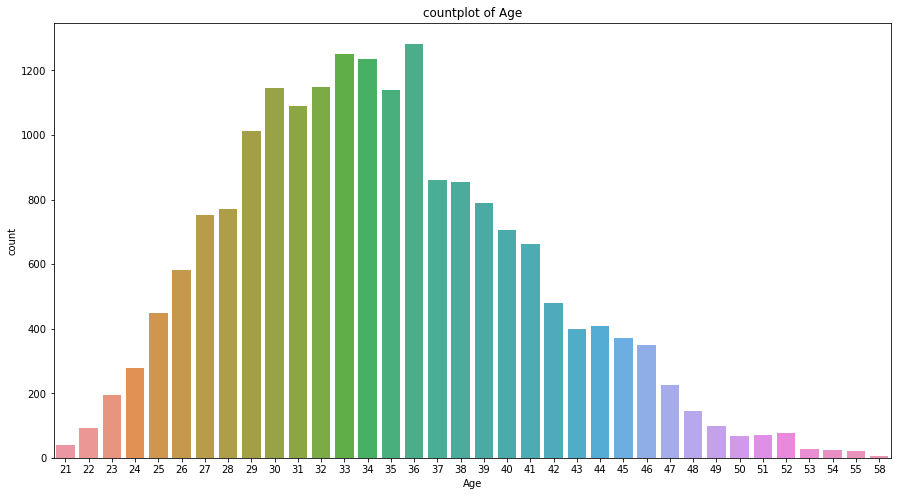

In [20]:
sns.countplot(data.Age)
plt.title("countplot of Age")
plt.show()

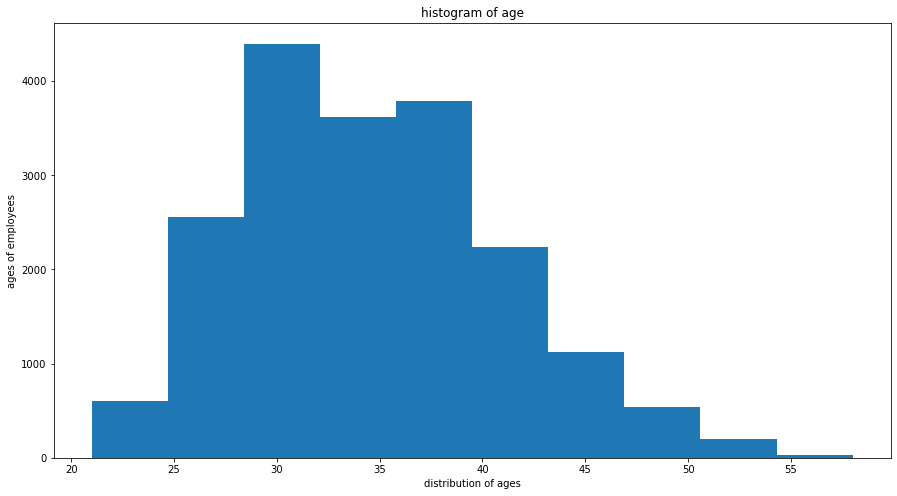

In [21]:
plt.hist(data.Age)
plt.title("histogram of age")
plt.xlabel("distribution of ages")
plt.ylabel("ages of employees")
plt.show()

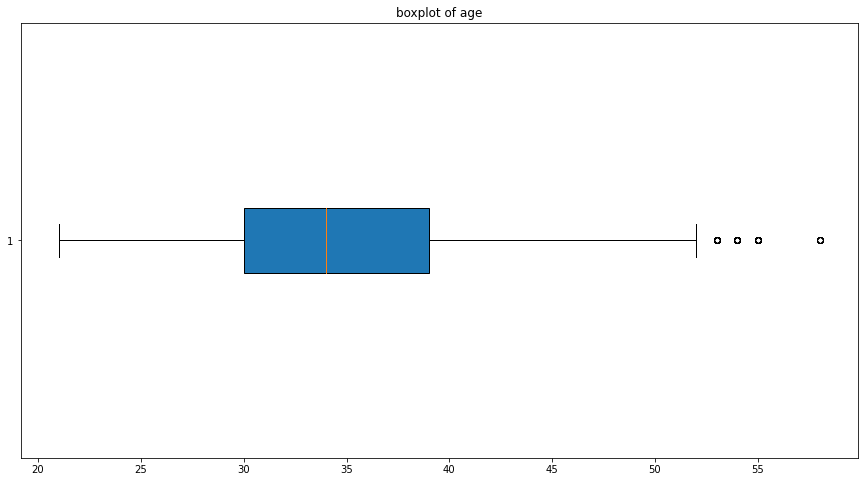

In [22]:
plt.boxplot(data.Age,vert = False,patch_artist=True)
plt.title("boxplot of age")
plt.show()

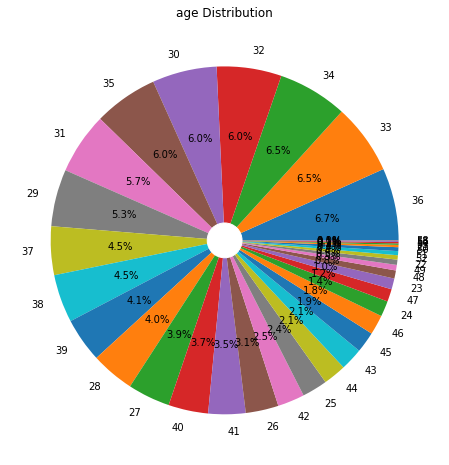

In [23]:
Frequency_age=data["Age"].value_counts()
keys=Frequency_age.keys().to_list()
counts=Frequency_age.to_list()
plt.rcParams['figure.figsize'] = [10,8]
plt.pie(x=counts,labels=keys,autopct="%1.1f%%")
circle=plt.Circle(xy=(0,0),radius=0.1,color="white")
plt.gcf()
plt.gca().add_artist(circle)
plt.title("age Distribution")
plt.show()

In [24]:
from scipy.stats import ttest_ind

In [25]:
Yes=data[data.Target=='0']
No=data[data.Target=='1']
ttest_ind(Yes.Age,No.Age)

Ttest_indResult(statistic=nan, pvalue=nan)

In [26]:
data.groupby("Age")["Target"].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
21,41.0,0.073171,0.263652,0.0,0.0,0.0,0.0,1.0
22,92.0,0.141304,0.350244,0.0,0.0,0.0,0.0,1.0
23,193.0,0.139896,0.347782,0.0,0.0,0.0,0.0,1.0
24,277.0,0.122744,0.328737,0.0,0.0,0.0,0.0,1.0
25,449.0,0.133630,0.340634,0.0,0.0,0.0,0.0,1.0
26,583.0,0.094340,0.292552,0.0,0.0,0.0,0.0,1.0
27,752.0,0.106383,0.308532,0.0,0.0,0.0,0.0,1.0
28,772.0,0.116580,0.321128,0.0,0.0,0.0,0.0,1.0
29,1013.0,0.082922,0.275901,0.0,0.0,0.0,0.0,1.0


#hence it is a good predictor

# Gender

In [27]:
data.Gender.value_counts()

Male      11103
Female     8001
Name: Gender, dtype: int64

In [28]:
data.Gender.describe()

count     19104
unique        2
top        Male
freq      11103
Name: Gender, dtype: object

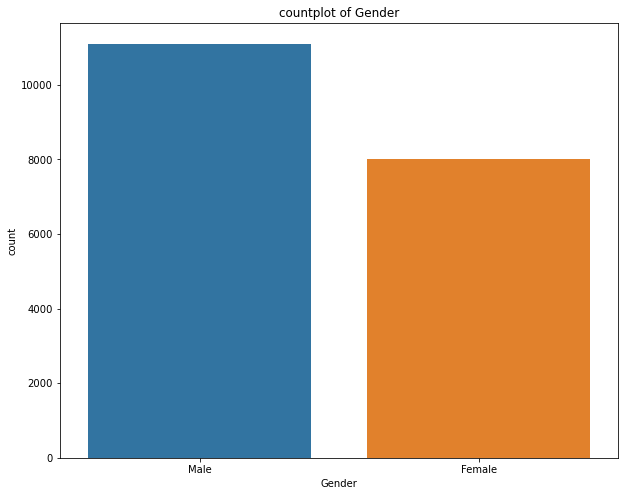

In [29]:
sns.countplot(data.Gender)
plt.title("countplot of Gender")
plt.show()

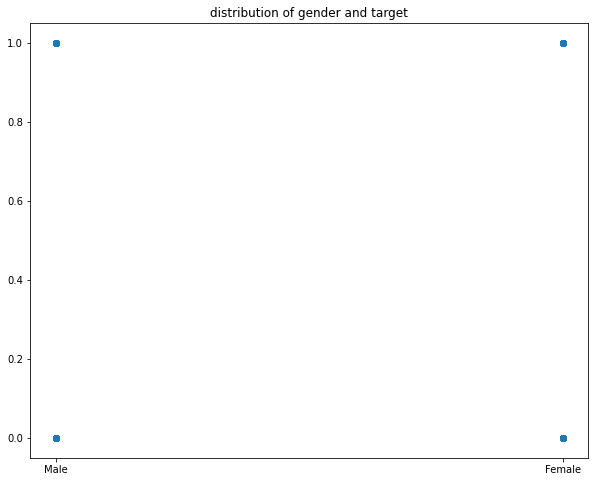

In [30]:
plt.scatter(x = "Gender",y ="Target",data=data)
plt.title("distribution of gender and target")
plt.show()

In [31]:
data.groupby("Gender")["Target"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,8001.0,0.083490,0.276638,0.0,0.0,0.0,0.0,1.0
Male,11103.0,0.085382,0.279462,0.0,0.0,0.0,0.0,1.0


In [32]:
a1=pd.crosstab(data.Gender,data.Target)
print(a1)
b1=chi2_contingency(a1)
print('\np value is:',b1[1])

Target      0    1
Gender            
Female   7333  668
Male    10155  948

p value is: 0.6617616912687716


#see here  p_value is greater than 0.05 we can consider this as a bad predictor

# Education_Level

In [33]:
data.Education_Level.value_counts()

Bachelor    6864
Master      6327
College     5913
Name: Education_Level, dtype: int64

In [34]:
data.Education_Level.describe()

count        19104
unique           3
top       Bachelor
freq          6864
Name: Education_Level, dtype: object

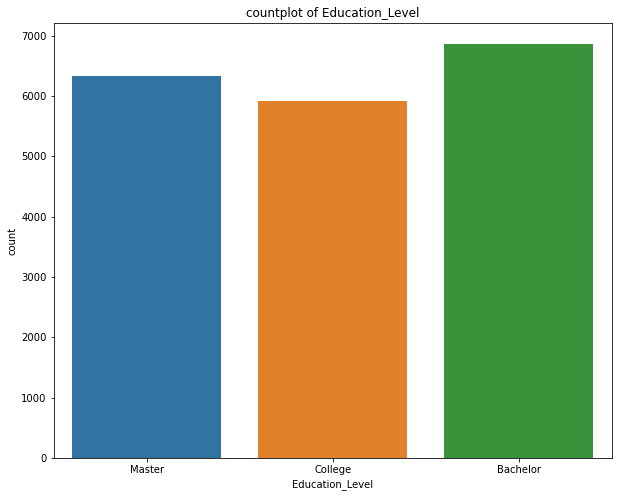

In [35]:
sns.countplot(data.Education_Level)
plt.title("countplot of Education_Level")
plt.show()

In [36]:
data.groupby("Education_Level")["Target"].describe()

,count,mean,std,min,25%,50%,75%,max
Education_Level,,,,,,,,
Bachelor,6864.0,0.076777,0.266257,0.0,0.0,0.0,0.0,1.0
College,5913.0,0.091662,0.288573,0.0,0.0,0.0,0.0,1.0
Master,6327.0,0.086455,0.281057,0.0,0.0,0.0,0.0,1.0


In [37]:
a2=pd.crosstab(data.Education_Level,data.Target)
print(a2)
b2=chi2_contingency(a2)
print('\np value is:',b2[1])

Target              0    1
Education_Level           
Bachelor         6337  527
College          5371  542
Master           5780  547

p value is: 0.008590427144863038


#hence it iis a good predictor

# City

In [38]:
data.City.value_counts()

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64

In [39]:
data.City.describe()

count     19104
unique       29
top         C20
freq       1008
Name: City, dtype: object

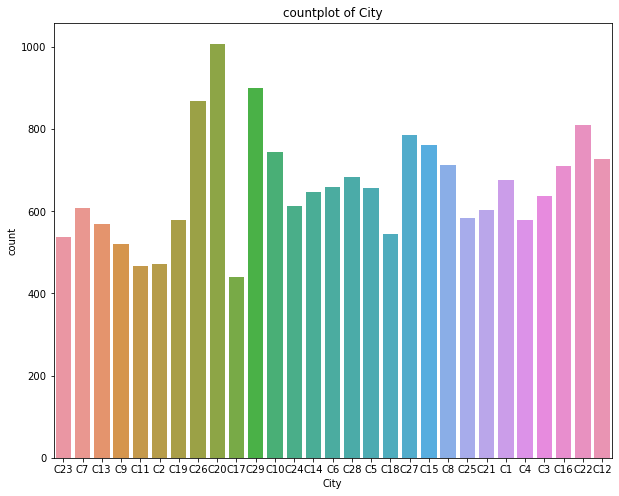

In [40]:
sns.countplot(data.City)
plt.title("countplot of City")
plt.show()

Text(0.5, 1.0, 'City vs Target')

<Figure size 1080x36000 with 0 Axes>

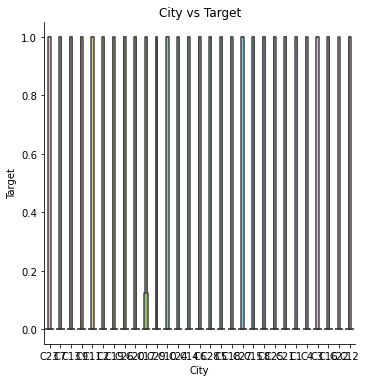

In [41]:
plt.figure(figsize=(15,500))
sns.catplot(x = 'City', y = 'Target', kind = 'boxen', data = data)
plt.title('City vs Target')

In [44]:
a3=pd.crosstab(data.City,data.Target)
print(a3)
b3=chi2_contingency(a3)
print('\np value is:',b3[1])

Target    0    1
City            
C1      621   56
C10     683   61
C11     423   45
C12     674   53
C13     511   58
C14     590   58
C15     692   69
C16     659   50
C17     385   55
C18     500   44
C19     538   41
C2      417   55
C20     897  111
C21     555   48
C22     759   50
C23     481   57
C24     563   51
C25     530   54
C26     804   65
C27     726   60
C28     624   59
C29     849   51
C3      585   52
C4      526   52
C5      608   48
C6      605   55
C7      557   52
C8      659   53
C9      467   53

p value is: 0.0010330963203655653


In [46]:
#here i did chi_contingency because to know that column good or bad

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                19104 non-null  int64 
 1   Age                   19104 non-null  int64 
 2   Gender                19104 non-null  object
 3   City                  19104 non-null  object
 4   Education_Level       19104 non-null  object
 5   Salary                19104 non-null  int64 
 6   Dateofjoining         19104 non-null  object
 7   LastWorkingDate       1616 non-null   object
 8   Joining Designation   19104 non-null  int64 
 9   Designation           19104 non-null  int64 
 10  Total Business Value  19104 non-null  int64 
 11  Quarterly Rating      19104 non-null  int64 
 12  Target                19104 non-null  int64 
dtypes: int64(8), object(5)
memory usage: 1.9+ MB


# Salary

In [48]:
data.Salary.value_counts()

48747     57
109652    32
68356     30
42260     28
67490     28
          ..
59653      1
19235      1
17186      1
49659      1
57356      1
Name: Salary, Length: 2383, dtype: int64

In [49]:
data.Salary.describe()

count     19104.000000
mean      65652.025126
std       30914.515344
min       10747.000000
25%       42383.000000
50%       60087.000000
75%       83969.000000
max      188418.000000
Name: Salary, dtype: float64

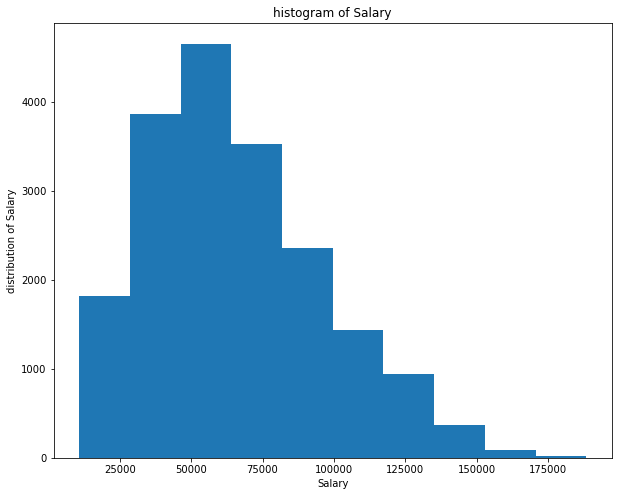

In [50]:
plt.hist(data.Salary)
plt.title("histogram of Salary")
plt.xlabel("Salary")
plt.ylabel("distribution of Salary")
plt.show()

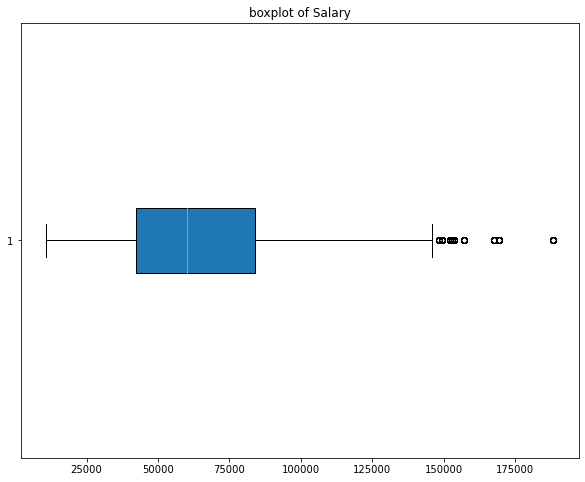

In [51]:
plt.boxplot(data.Salary,vert = False,patch_artist = True)
plt.title("boxplot of Salary")
plt.show()

In [52]:
IQR = data.Salary.quantile(0.75)-data.Salary.quantile(0.25)
IQR

41586.0

In [53]:
ul= data.Salary.quantile(0.75)+ (1.5*IQR)
ul

146348.0

In [54]:
len(data[data.Salary>ul])

188

In [55]:
Yes=data[data.Target=='0']
No=data[data.Target=='1']
ttest_ind(Yes.Salary,No.Salary)

Ttest_indResult(statistic=nan, pvalue=nan)

# Dateofjoining

In [56]:
data.Dateofjoining.value_counts()

7/23/2012     192
7/31/2017     150
07-04-2016    146
4/25/2013     134
7/30/2012     118
             ... 
11-10-2015      1
5/18/2016       1
2/13/2015       1
7/23/2015       1
9/26/2015       1
Name: Dateofjoining, Length: 869, dtype: int64

In [57]:
data.Dateofjoining.describe()

count         19104
unique          869
top       7/23/2012
freq            192
Name: Dateofjoining, dtype: object

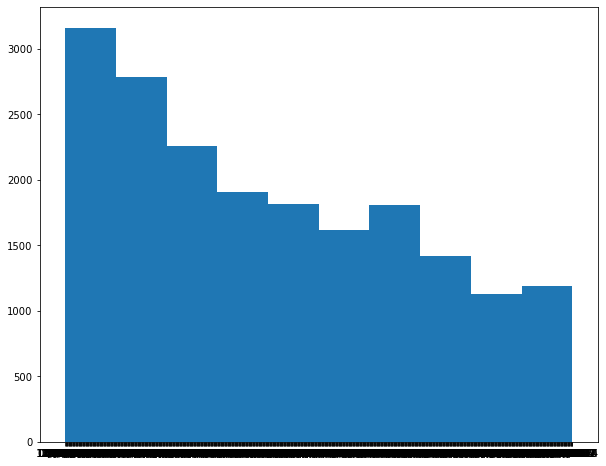

In [58]:
plt.hist(data.Dateofjoining)
plt.show()

In [59]:
data.drop(['Dateofjoining'],axis = 1,inplace = True)

# LastWorkingDate

In [60]:
data.drop(['LastWorkingDate'],axis = 1,inplace = True)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                19104 non-null  int64 
 1   Age                   19104 non-null  int64 
 2   Gender                19104 non-null  object
 3   City                  19104 non-null  object
 4   Education_Level       19104 non-null  object
 5   Salary                19104 non-null  int64 
 6   Joining Designation   19104 non-null  int64 
 7   Designation           19104 non-null  int64 
 8   Total Business Value  19104 non-null  int64 
 9   Quarterly Rating      19104 non-null  int64 
 10  Target                19104 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 1.6+ MB


# Joining Designation

In [62]:
data["Joining Designation"].value_counts()

1    9831
2    5955
3    2847
4     341
5     130
Name: Joining Designation, dtype: int64

In [63]:
data["Joining Designation"].describe()

count    19104.000000
mean         1.690536
std          0.836984
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: Joining Designation, dtype: float64

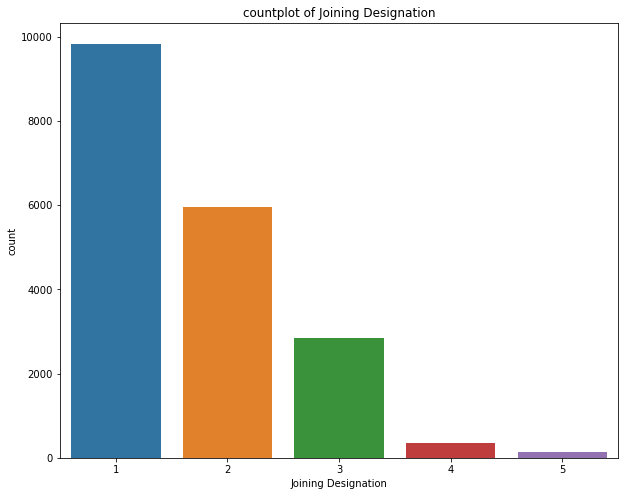

In [64]:
sns.countplot(data["Joining Designation"])
plt.title("countplot of Joining Designation")
plt.show()

In [65]:
tukey_jd= pairwise_tukeyhsd(data.Target, data["Joining Designation"], alpha = 0.05)
print(tukey_jd)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0175 0.0012  0.0051   0.03   True
     1      3   0.0197 0.0076  0.0036 0.0359   True
     1      4   -0.012    0.9 -0.0538 0.0298  False
     1      5   -0.015    0.9 -0.0819  0.052  False
     2      3   0.0022    0.9 -0.0151 0.0195  False
     2      4  -0.0295 0.3139 -0.0718 0.0127  False
     2      5  -0.0325 0.6574 -0.0998 0.0348  False
     3      4  -0.0317 0.2706 -0.0752 0.0118  False
     3      5  -0.0347 0.6158 -0.1028 0.0333  False
     4      5   -0.003    0.9 -0.0812 0.0752  False
---------------------------------------------------


In [66]:
data.groupby(["Joining Designation"])["Target"].describe()

,count,mean,std,min,25%,50%,75%,max
Joining Designation,,,,,,,,
1,9831.0,0.076493,0.265798,0.0,0.0,0.0,0.0,1.0
2,5955.0,0.094039,0.291907,0.0,0.0,0.0,0.0,1.0
3,2847.0,0.096242,0.294974,0.0,0.0,0.0,0.0,1.0
4,341.0,0.064516,0.246031,0.0,0.0,0.0,0.0,1.0
5,130.0,0.061538,0.241245,0.0,0.0,0.0,0.0,1.0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                19104 non-null  int64 
 1   Age                   19104 non-null  int64 
 2   Gender                19104 non-null  object
 3   City                  19104 non-null  object
 4   Education_Level       19104 non-null  object
 5   Salary                19104 non-null  int64 
 6   Joining Designation   19104 non-null  int64 
 7   Designation           19104 non-null  int64 
 8   Total Business Value  19104 non-null  int64 
 9   Quarterly Rating      19104 non-null  int64 
 10  Target                19104 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 1.6+ MB


# Designation

In [68]:
data.Designation.value_counts()

2    6627
1    5202
3    4826
4    2144
5     305
Name: Designation, dtype: int64

In [69]:
data.Designation.describe()

count    19104.000000
mean         2.252670
std          1.026512
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Designation, dtype: float64

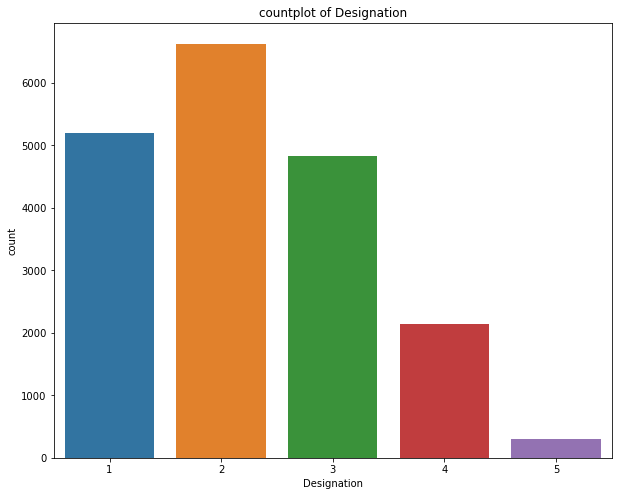

In [70]:
sns.countplot(data.Designation)
plt.title("countplot of Designation")
plt.show()

In [71]:
data.groupby("Designation")["Target"].describe()

,count,mean,std,min,25%,50%,75%,max
Designation,,,,,,,,
1,5202.0,0.114571,0.318535,0.0,0.0,0.0,0.0,1.0
2,6627.0,0.090539,0.286974,0.0,0.0,0.0,0.0,1.0
3,4826.0,0.069830,0.254887,0.0,0.0,0.0,0.0,1.0
4,2144.0,0.032649,0.177758,0.0,0.0,0.0,0.0,1.0
5,305.0,0.042623,0.202338,0.0,0.0,0.0,0.0,1.0


# Total Business Value

In [72]:
data["Total Business Value"].value_counts()

0          6499
200000      288
250000      148
500000      131
300000      107
           ... 
515070        1
2178050       1
920580        1
1244170       1
400140        1
Name: Total Business Value, Length: 10181, dtype: int64

In [73]:
data["Total Business Value"].describe()

count    1.910400e+04
mean     5.716621e+05
std      1.128312e+06
min     -6.000000e+06
25%      0.000000e+00
50%      2.500000e+05
75%      6.997000e+05
max      3.374772e+07
Name: Total Business Value, dtype: float64

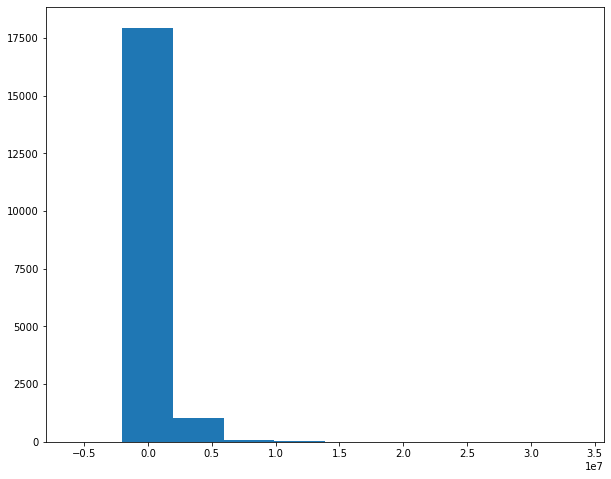

In [74]:
plt.hist(data["Total Business Value"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

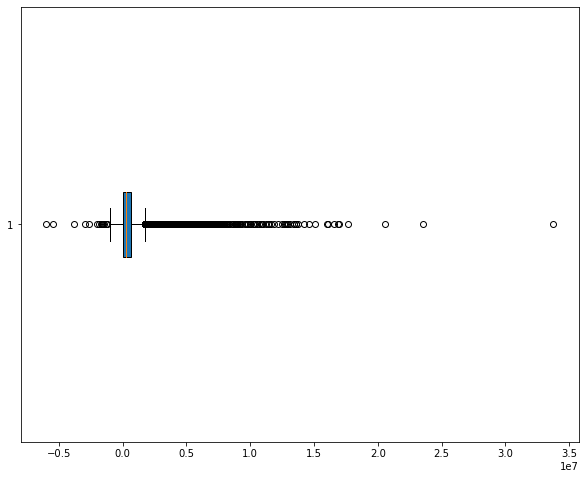

In [75]:
plt.boxplot(data["Total Business Value"],vert = False,patch_artist = True)
plt.show

In [76]:
IQR = data["Total Business Value"].quantile(0.75)-data["Total Business Value"].quantile(0.25)
IQR

699700.0

In [77]:
upper_limit= data["Total Business Value"].quantile(0.75)+ (1.5*IQR)
upper_limit

1749250.0

In [78]:
lower_limit = data["Total Business Value"].quantile(0.25)-(1.5*IQR)
lower_limit

-1049550.0

# Quarterly Rating

In [79]:
data["Quarterly Rating"].value_counts()

1    7679
2    5553
3    3895
4    1977
Name: Quarterly Rating, dtype: int64

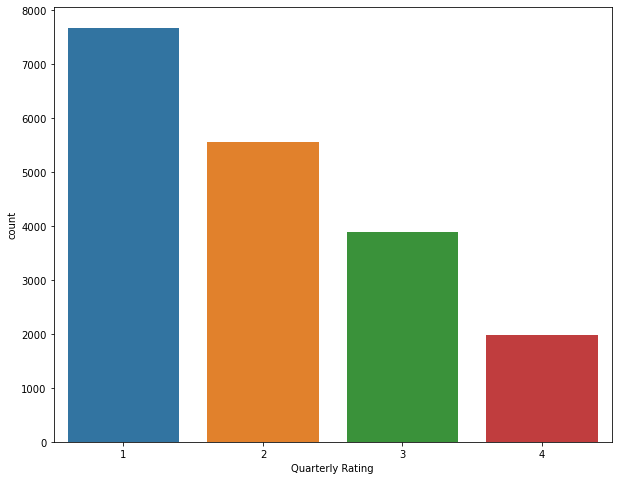

In [80]:
sns.countplot(data["Quarterly Rating"])
plt.show()

In [81]:
data["Quarterly Rating"].describe()

count    19104.000000
mean         2.008899
std          1.009832
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: Quarterly Rating, dtype: float64

In [82]:
data.groupby(data["Quarterly Rating"])["Target"].describe()

,count,mean,std,min,25%,50%,75%,max
Quarterly Rating,,,,,,,,
1,7679.0,0.186483,0.389521,0.0,0.0,0.0,0.0,1.0
2,5553.0,0.026292,0.160017,0.0,0.0,0.0,0.0,1.0
3,3895.0,0.007189,0.084492,0.0,0.0,0.0,0.0,1.0
4,1977.0,0.005058,0.070959,0.0,0.0,0.0,0.0,1.0


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                19104 non-null  int64 
 1   Age                   19104 non-null  int64 
 2   Gender                19104 non-null  object
 3   City                  19104 non-null  object
 4   Education_Level       19104 non-null  object
 5   Salary                19104 non-null  int64 
 6   Joining Designation   19104 non-null  int64 
 7   Designation           19104 non-null  int64 
 8   Total Business Value  19104 non-null  int64 
 9   Quarterly Rating      19104 non-null  int64 
 10  Target                19104 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 1.6+ MB


In [84]:
data1= data.copy()

# i have done group by because the Quarterly rating is done for every 4 months so, for every 4 month  the same employee id is generarted so to overcome the redundency of employee id i did group by

In [85]:
prakash=data1.groupby('Emp_ID')['Emp_ID','Age','Gender','City','Education_Level','Salary','Designation',"Total Business Value",
                       'Quarterly Rating','Target',"Joining Designation"].tail(1)
prakash.reset_index(drop=True,inplace=True)
prakash1=data1.groupby('Emp_ID').agg({'Total Business Value':'sum'})
prakash1.reset_index(drop=True,inplace=True)
siv=pd.concat([prakash,prakash1],axis=1,ignore_index=False)

In [86]:
siv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_ID                2381 non-null   int64 
 1   Age                   2381 non-null   int64 
 2   Gender                2381 non-null   object
 3   City                  2381 non-null   object
 4   Education_Level       2381 non-null   object
 5   Salary                2381 non-null   int64 
 6   Designation           2381 non-null   int64 
 7   Total Business Value  2381 non-null   int64 
 8   Quarterly Rating      2381 non-null   int64 
 9   Target                2381 non-null   int64 
 10  Joining Designation   2381 non-null   int64 
 11  Total Business Value  2381 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 223.3+ KB


In [87]:
siv.shape

(2381, 12)

In [88]:
emp = siv["Emp_ID"]

In [89]:
from sklearn.preprocessing import StandardScaler
stc=StandardScaler()

In [90]:
siv.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Designation,Total Business Value,Quarterly Rating,Target,Joining Designation,Total Business Value
0,1,28,Male,C23,Master,57387,1,0,2,1,1,1715580
1,2,31,Male,C7,Master,67016,2,0,1,0,2,0
2,4,43,Male,C13,Master,65603,2,0,1,1,2,350000
3,5,29,Male,C9,College,46368,1,0,1,1,1,120360
4,6,31,Female,C11,Bachelor,78728,3,0,2,0,3,1265000


In [91]:
#StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature

In [92]:
p=siv[['Age','Salary','Total Business Value']]

In [93]:
scaled_array=stc.fit_transform(p)

In [94]:
scaled_array

array([[-0.94668243, -0.06861573, -0.23515458, -0.31464103],
       [-0.44518787,  0.27069993, -0.23515458, -0.50264571],
       [ 1.56079034,  0.22090732, -0.23515458, -0.46429038],
       ...,
       [ 1.89512005, -0.84447128, -0.23515458, -0.1941494 ],
       [-0.94668243,  0.35816296, -0.23515458, -0.39548858],
       [-0.61235272,  0.38480359,  0.12756093, -0.25078927]])

In [95]:
scaled_num=pd.DataFrame(scaled_array,columns=p.columns)#created dataframe because scaled in num_array formate

In [96]:
cat=siv[['Gender','City','Education_Level']]

In [97]:
cat.head()

,Gender,City,Education_Level
0,Male,C23,Master
1,Male,C7,Master
2,Male,C13,Master
3,Male,C9,College
4,Female,C11,Bachelor


In [98]:
#LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder.

In [99]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat['Gender']=le.fit_transform(cat['Gender'])
cat['City']=le.fit_transform(cat['City'])
cat['Education_Level']=le.fit_transform(cat['Education_Level'])

In [100]:
cat.head(5)

,Gender,City,Education_Level
0,1,15,2
1,1,26,2
2,1,4,2
3,1,28,1
4,0,2,0


In [101]:
pra=siv[['Designation','Quarterly Rating','Target',"Joining Designation"]]

In [102]:
DF=pd.concat([scaled_num,cat],axis=1)

In [103]:
df=pd.concat([DF,pra],axis=1)

In [104]:
pro= pd.concat([df,emp],axis = 1)

In [105]:
pro

,Age,Salary,Total Business Value,Total Business Value,Gender,City,Education_Level,Designation,Quarterly Rating,Target,Joining Designation,Emp_ID
0,-0.946682,-0.068616,-0.235155,-0.314641,1,15,2,1,2,1,1,1
1,-0.445188,0.270700,-0.235155,-0.502646,1,26,2,2,1,0,2,2
2,1.560790,0.220907,-0.235155,-0.464290,1,4,2,2,1,1,2,4
3,-0.779518,-0.456914,-0.235155,-0.489456,1,28,1,1,1,1,1,5
4,-0.445188,0.683418,-0.235155,-0.364019,0,2,0,3,2,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.056307,0.827440,0.210421,1.880735,1,16,1,3,4,0,2,2784
2377,0.056307,-1.664305,-0.235155,-0.502646,0,28,1,1,1,1,1,2785
2378,1.895120,-0.844471,-0.235155,-0.194149,1,10,1,2,1,1,2,2786
2379,-0.946682,0.358163,-0.235155,-0.395489,0,12,2,1,1,1,1,2787


# smote for balancing the target variable

In [106]:
import pandas as pd
import sklearn
from sklearn.utils import resample

In [107]:
pro.Target.value_counts()

1    1616
0     765
Name: Target, dtype: int64

In [108]:
t_default = pro[pro.Target==0]

In [109]:
len(t_default)

765

In [110]:
not_default = pro[pro.Target==1] 

In [111]:
len(not_default)

1616

In [112]:
from sklearn.utils import resample
t_upsampled1 = resample(t_default,
                          replace=True, # sample with replacement
                          n_samples=len(not_default), # match number in majority class,
                          random_state=27) # reproducible results
t_upsampled1

,Age,Salary,Total Business Value,Total Business Value,Gender,City,Education_Level,Designation,Quarterly Rating,Target,Joining Designation,Emp_ID
54,-0.278023,0.703152,0.239898,2.490146,1,21,1,3,3,0,1,68
2163,0.390636,0.564170,-0.055745,-0.457462,0,12,1,2,1,0,2,2537
1662,-0.779518,0.716825,-0.235155,-0.502646,1,22,0,3,1,0,3,1955
2350,-0.779518,0.268198,0.049355,-0.388873,1,12,0,2,2,0,2,2752
875,-1.615342,-1.373302,-0.235155,-0.502646,1,8,1,1,1,0,1,1029
...,...,...,...,...,...,...,...,...,...,...,...,...
1217,0.056307,-1.056081,0.474286,1.260702,1,18,1,2,3,0,1,1432
2130,0.892131,-0.255206,0.167669,-0.316585,0,23,1,3,2,0,3,2497
1614,-0.110858,-0.284384,-0.235155,-0.502646,0,26,2,3,1,0,3,1894
1499,1.059296,0.294275,-0.235155,-0.502646,1,19,2,3,1,0,3,1758


In [113]:
upsampled = pd.concat([not_default, t_upsampled1]) 
upsampled

,Age,Salary,Total Business Value,Total Business Value,Gender,City,Education_Level,Designation,Quarterly Rating,Target,Joining Designation,Emp_ID
0,-0.946682,-0.068616,-0.235155,-0.314641,1,15,2,1,2,1,1,1
2,1.560790,0.220907,-0.235155,-0.464290,1,4,2,2,1,1,2,4
3,-0.779518,-0.456914,-0.235155,-0.489456,1,28,1,1,1,1,1,5
5,0.056307,0.398970,-0.235155,-0.502646,1,11,1,3,1,1,3,8
7,0.223472,-1.100094,-0.235155,-0.216934,1,15,2,1,1,1,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...
1217,0.056307,-1.056081,0.474286,1.260702,1,18,1,2,3,0,1,1432
2130,0.892131,-0.255206,0.167669,-0.316585,0,23,1,3,2,0,3,2497
1614,-0.110858,-0.284384,-0.235155,-0.502646,0,26,2,3,1,0,3,1894
1499,1.059296,0.294275,-0.235155,-0.502646,1,19,2,3,1,0,3,1758


In [114]:
upsampled.Target.value_counts()

0    1616
1    1616
Name: Target, dtype: int64

In [115]:
data_emp=upsampled.reset_index(drop=True)

In [116]:
data_emp

,Age,Salary,Total Business Value,Total Business Value,Gender,City,Education_Level,Designation,Quarterly Rating,Target,Joining Designation,Emp_ID
0,-0.946682,-0.068616,-0.235155,-0.314641,1,15,2,1,2,1,1,1
1,1.560790,0.220907,-0.235155,-0.464290,1,4,2,2,1,1,2,4
2,-0.779518,-0.456914,-0.235155,-0.489456,1,28,1,1,1,1,1,5
3,0.056307,0.398970,-0.235155,-0.502646,1,11,1,3,1,1,3,8
4,0.223472,-1.100094,-0.235155,-0.216934,1,15,2,1,1,1,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...
3227,0.056307,-1.056081,0.474286,1.260702,1,18,1,2,3,0,1,1432
3228,0.892131,-0.255206,0.167669,-0.316585,0,23,1,3,2,0,3,2497
3229,-0.110858,-0.284384,-0.235155,-0.502646,0,26,2,3,1,0,3,1894
3230,1.059296,0.294275,-0.235155,-0.502646,1,19,2,3,1,0,3,1758


In [117]:
data_emp.drop(["Emp_ID"],axis = 1,inplace = True)

In [118]:
data_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   3232 non-null   float64
 1   Salary                3232 non-null   float64
 2   Total Business Value  3232 non-null   float64
 3   Total Business Value  3232 non-null   float64
 4   Gender                3232 non-null   int32  
 5   City                  3232 non-null   int32  
 6   Education_Level       3232 non-null   int32  
 7   Designation           3232 non-null   int64  
 8   Quarterly Rating      3232 non-null   int64  
 9   Target                3232 non-null   int64  
 10  Joining Designation   3232 non-null   int64  
dtypes: float64(4), int32(3), int64(4)
memory usage: 240.0 KB


In [119]:
x=data_emp.drop(['Target'],axis=1)
y=data_emp[['Target']]

In [120]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [121]:
print('xtrain:',xtrain.shape)
print('xtest:',xtest.shape)
print('ytrain:',ytrain.shape)
print('ytest:',ytest.shape)

xtrain: (2424, 10)
xtest: (808, 10)
ytrain: (2424, 1)
ytest: (808, 1)


# SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

In [122]:
from sklearn.svm import SVC

In [123]:
svc=SVC(kernel='linear',C=1,gamma='auto',probability=True).fit(xtrain,ytrain)

ypred=svc.predict(xtest)
ypred

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,

In [124]:
predictions = svc.predict(xtest)
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74       407
           1       0.71      0.93      0.81       401

    accuracy                           0.78       808
   macro avg       0.81      0.78      0.78       808
weighted avg       0.81      0.78      0.77       808



In [125]:
test=pd.read_csv('test_hXY9mYw.csv')

In [126]:
test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [127]:
pro.head()

,Age,Salary,Total Business Value,Total Business Value,Gender,City,Education_Level,Designation,Quarterly Rating,Target,Joining Designation,Emp_ID
0,-0.946682,-0.068616,-0.235155,-0.314641,1,15,2,1,2,1,1,1
1,-0.445188,0.270700,-0.235155,-0.502646,1,26,2,2,1,0,2,2
2,1.560790,0.220907,-0.235155,-0.464290,1,4,2,2,1,1,2,4
3,-0.779518,-0.456914,-0.235155,-0.489456,1,28,1,1,1,1,1,5
4,-0.445188,0.683418,-0.235155,-0.364019,0,2,0,3,2,0,3,6


In [128]:
pra=pd.merge(test,pro, on='Emp_ID')

In [129]:
pra.shape

(741, 12)

In [130]:
pra=pra.drop(['Emp_ID','Target'],axis=1)

In [131]:
pra.head()

,Age,Salary,Total Business Value,Total Business Value,Gender,City,Education_Level,Designation,Quarterly Rating,Joining Designation
0,0.056307,1.352747,2.146411,2.506409,0,12,2,4,3,2
1,0.892131,-0.111361,0.387186,1.674435,1,20,1,3,3,1
2,0.892131,1.318494,1.103406,5.018603,1,4,1,4,2,2
3,1.059296,1.038803,0.780163,1.375016,0,27,1,4,2,1
4,-0.278023,4.548777,3.090628,5.856064,1,24,2,5,2,2


In [132]:
test_pred=svc.predict(pra)
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [133]:
submission105=pd.read_csv('sample_submission_znWiLZ4.csv')

In [134]:
submission105

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
...,...,...
736,2134,0
737,2255,0
738,448,0
739,1644,0


In [135]:
submission105['Target']=test_pred

In [136]:
submission105.to_csv('submission106.csv',index=False)